<a href="https://colab.research.google.com/github/Charly156/Actividad_6_regresion_lineal_multiple_y_no_lineal/blob/main/Actividad_6_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerías
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
import seaborn as sns

In [ ]:
#Leer archivo
df=pd.read_csv('BD_Socio formador (TrainingDataComplete) (1).csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
#Se verifica que los datos están completos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
#Selección de variables numericas
#se omitió risk flag por ser interpretada como categórica
numericas=df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']]
numericas.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,3,13,0
1,7574516,40,10,9,13,0
2,3991815,66,4,4,10,0
3,6256451,41,2,2,12,1
4,5768871,47,11,3,14,1


In [ ]:
#Encontrar todas las correlaciones entre las variables
Corr_Factors=numericas.corr()
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors = abs(Corr_Factors)
Corr_Factors

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,0.000652,0.006422,0.007045,0.002397,0.003091
Age,0.000652,1.000000,0.001118,0.002154,0.020134,0.021809
Experience,0.006422,0.001118,1.000000,0.646098,0.019309,0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,0.016942
CURRENT_HOUSE_YRS,0.002397,0.020134,0.019309,0.005372,1.000000,0.004375
Risk_Flag,0.003091,0.021809,0.034523,0.016942,0.004375,1.000000


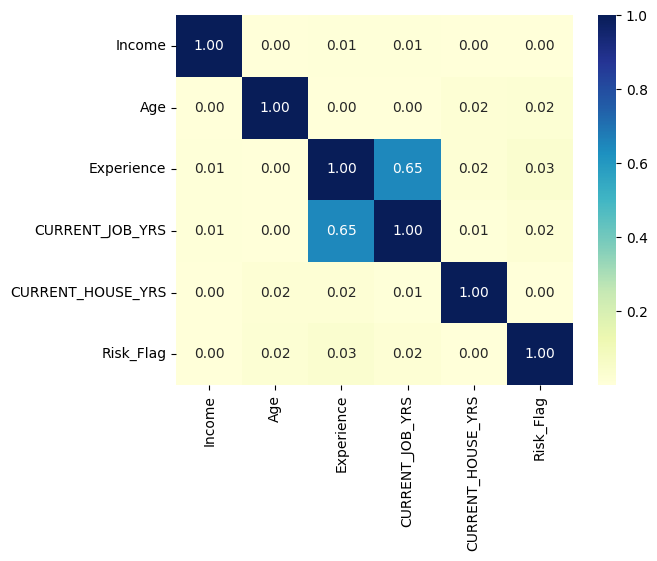

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_map= sns.heatmap(Corr_Factors, cmap= 'YlGnBu', annot=True, fmt=".2f")
Heat_map
plt.show()

##Correlación más alta

In [ ]:
#Se importa libreria para poder realizar una regresión lineal
from sklearn.linear_model import LinearRegression

In [ ]:
#Declarar variable dependiente e independiente
#nos interesa saber el risk flag
var_indep=numericas[['Experience']]
var_dep=numericas['Risk_Flag']
model=LinearRegression()
model.fit(X=var_indep,y=var_dep)
y_pred=model.predict(X=numericas[['Experience']])
numericas.insert(0,'predictions_e',y_pred)
numericas

,predictions_e,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.136382,1303834,23,3,3,13,0
1,0.123159,7574516,40,10,9,13,0
2,0.134493,3991815,66,4,4,10,0
3,0.138271,6256451,41,2,2,12,1
4,0.121271,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...
251995,0.117493,8154883,43,13,6,11,0
251996,0.123159,2843572,26,10,6,11,0
251997,0.128826,4522448,46,7,7,12,0
251998,0.142049,6507128,45,0,0,10,0


In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Experience'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00188894]),
 'rank_': 1,
 'singular_': array([3013.27021025]),
 'intercept_': 0.14204889724638128}

In [ ]:
#todos lo valores se redondean a 0 porque son menores a 0.5
numericas['predictions_e'].max()

0.14204889724638128

In [ ]:
numericas['predictions_e']= round(numericas['predictions_e'],0)
numericas

,predictions_e,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.0,1303834,23,3,3,13,0
1,0.0,7574516,40,10,9,13,0
2,0.0,3991815,66,4,4,10,0
3,0.0,6256451,41,2,2,12,1
4,0.0,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...
251995,0.0,8154883,43,13,6,11,0
251996,0.0,2843572,26,10,6,11,0
251997,0.0,4522448,46,7,7,12,0
251998,0.0,6507128,45,0,0,10,0


In [ ]:
#Coeficiente de determinación (r^2)
coef_Deter1=model.score(X=var_indep,y=var_dep)
print("Determinacion:",coef_Deter1)
coef_Correl1=np.sqrt(coef_Deter1)
print("Correlacion",coef_Correl1)

Determinacion: 0.0011918108008016626
Correlacion 0.03452261289070777


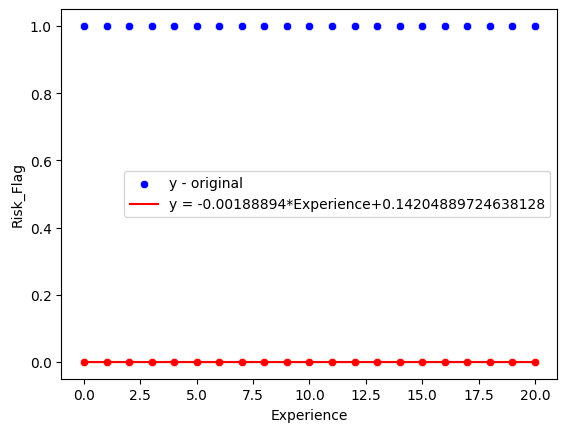

In [ ]:
#Grafica del modelo: real vs predicciones
sns.scatterplot(x="Experience",y="Risk_Flag",color="blue",data=numericas, label = 'y - original')
sns.scatterplot(x="Experience",y="predictions_e",color="red",data=numericas)
sns.lineplot(x="Experience",y="predictions_e",color="red",data=numericas, label = 'y = -0.00188894*Experience+0.14204889724638128')
plt.show()

##Segunda correlación más alta

In [ ]:
#Declarar variable dependiente e independiente
#nos interesa saber el risk flag
var_indep_a=numericas[['Age']]
var_dep_a=numericas['Risk_Flag']
model=LinearRegression()
model.fit(X=var_indep_a,y=var_dep_a)
y_pred=model.predict(X=numericas[['Age']])
numericas.insert(0,'predictions_a',y_pred)
numericas

,predictions_a,predictions_e,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.134315,0.0,1303834,23,3,3,13,0
1,0.127178,0.0,7574516,40,10,9,13,0
2,0.116264,0.0,3991815,66,4,4,10,0
3,0.126759,0.0,6256451,41,2,2,12,1
4,0.124240,0.0,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...,...
251995,0.125919,0.0,8154883,43,13,6,11,0
251996,0.133055,0.0,2843572,26,10,6,11,0
251997,0.124660,0.0,4522448,46,7,7,12,0
251998,0.125080,0.0,6507128,45,0,0,10,0


In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Age'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00041978]),
 'rank_': 1,
 'singular_': array([8565.97013903]),
 'intercept_': 0.1439695063531774}

In [ ]:
#todos lo valores se redondean a 0 porque son menores a 0.5
numericas['predictions_a'].max()

0.1351542162111839

In [ ]:
numericas['predictions_a']= round(numericas['predictions_a'],0)
numericas

,predictions_a,predictions_e,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.0,0.0,1303834,23,3,3,13,0
1,0.0,0.0,7574516,40,10,9,13,0
2,0.0,0.0,3991815,66,4,4,10,0
3,0.0,0.0,6256451,41,2,2,12,1
4,0.0,0.0,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...,...
251995,0.0,0.0,8154883,43,13,6,11,0
251996,0.0,0.0,2843572,26,10,6,11,0
251997,0.0,0.0,4522448,46,7,7,12,0
251998,0.0,0.0,6507128,45,0,0,10,0


In [ ]:
#Coeficiente de determinación (r^2)
coef_Deter2=model.score(X=var_indep_a,y=var_dep_a)
print("Determinacion:",coef_Deter2)
coef_Correl2=np.sqrt(coef_Deter2)
print("Correlacion",coef_Correl2)

Determinacion: 0.0004756445218556671
Correlacion 0.0218092760507007


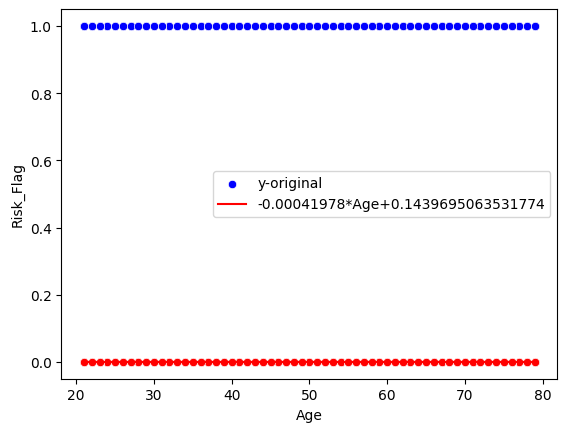

In [ ]:
#Grafica del modelo: real vs predicciones
sns.scatterplot(x="Age",y="Risk_Flag",color="blue",data=numericas, label = 'y-original')
sns.scatterplot(x="Age",y="predictions_a",color="red",data=numericas)
sns.lineplot(x="Age",y="predictions_a",color="red",data=numericas, label = '-0.00041978*Age+0.1439695063531774')
plt.show()

##Tercera Correlación más alta

In [ ]:
#Declarar variable dependiente e independiente
#nos interesa saber el risk flag
var_indep_c=numericas[['CURRENT_JOB_YRS']]
var_dep_c=numericas['Risk_Flag']
model=LinearRegression()
model.fit(X=var_indep_c,y=var_dep_c)
y_pred=model.predict(X=numericas[['CURRENT_JOB_YRS']])
numericas.insert(0,'predictions_c',y_pred)
numericas

,predictions_c,predictions_a,predictions_e,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.128086,0.0,0.0,1303834,23,3,3,13,0
1,0.118932,0.0,0.0,7574516,40,10,9,13,0
2,0.126561,0.0,0.0,3991815,66,4,4,10,0
3,0.129612,0.0,0.0,6256451,41,2,2,12,1
4,0.128086,0.0,0.0,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,0.123509,0.0,0.0,8154883,43,13,6,11,0
251996,0.123509,0.0,0.0,2843572,26,10,6,11,0
251997,0.121984,0.0,0.0,4522448,46,7,7,12,0
251998,0.132664,0.0,0.0,6507128,45,0,0,10,0


In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CURRENT_JOB_YRS'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00152569]),
 'rank_': 1,
 'singular_': array([1830.80244488]),
 'intercept_': 0.13266350613903863}

In [ ]:
#todos lo valores se redondean a 0 porque son menores a 0.5
numericas['predictions_c'].max()

0.13266350613903863

In [ ]:
numericas['predictions_c']= round(numericas['predictions_c'],0)
numericas

,predictions_c,predictions_a,predictions_e,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.0,0.0,0.0,1303834,23,3,3,13,0
1,0.0,0.0,0.0,7574516,40,10,9,13,0
2,0.0,0.0,0.0,3991815,66,4,4,10,0
3,0.0,0.0,0.0,6256451,41,2,2,12,1
4,0.0,0.0,0.0,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,0.0,0.0,0.0,8154883,43,13,6,11,0
251996,0.0,0.0,0.0,2843572,26,10,6,11,0
251997,0.0,0.0,0.0,4522448,46,7,7,12,0
251998,0.0,0.0,0.0,6507128,45,0,0,10,0


In [ ]:
#Coeficiente de determinación (r^2)
coef_Deter3=model.score(X=var_indep_c,y=var_dep_c)
print("Determinacion:",coef_Deter3)
coef_Correl3=np.sqrt(coef_Deter3)
print("Correlacion",coef_Correl3)

Determinacion: 0.0002870172024285189
Correlacion 0.016941582052114226


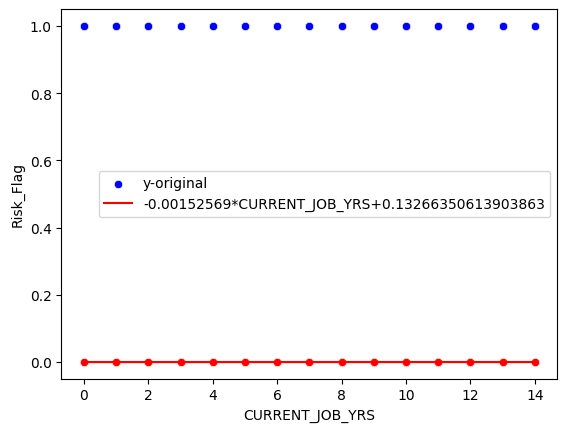

In [ ]:
#Grafica del modelo: real vs predicciones
sns.scatterplot(x="CURRENT_JOB_YRS",y="Risk_Flag",color="blue",data=numericas, label = 'y-original')
sns.scatterplot(x="CURRENT_JOB_YRS",y="predictions_c",color="red",data=numericas)
sns.lineplot(x="CURRENT_JOB_YRS",y="predictions_c",color="red",data=numericas, label = '-0.00152569*CURRENT_JOB_YRS+0.13266350613903863')
plt.show()